<a href="https://colab.research.google.com/github/ravitejays/ravitejays/blob/main/1st_Project_Gold_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below are several libraries I'm using for the project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #useful for plotting
import seaborn as sns
from sklearn.model_selection import train_test_split  #Splitting Original data as Train and test data
from sklearn.ensemble import RandomForestRegressor  #Using RF Regression Algorithm
from sklearn import metrics   #Evaluate model to find the error and accuracy score

Now we will be doing the data collection and Processing.
We will load the csv data to a Pandas DataFrame

In [ ]:
golddata = pd.read_csv('/content/gld_price_data.csv')
print(golddata)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]



We have data of Approximately 10 Years and 2290 rows and 6 Columns
* SPX or The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. 
* EUR/USD - Currency Pair of Euro and USD




In [ ]:
golddata.info()    #Information about the data 
golddata.shape  #Knowing the number of rows and columns
golddata.isnull().sum()   #Knowimg the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
golddata.describe()    #The fn gives the statistical measure of the datamlike mean, percentile etc..

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Now we will understand the Correlation between the columns for any regression problems.
1. Positive Correlation(if columns we are considering is directly proportional)
2. Negative Correlation(if columns we are considering is indirectly proportional)

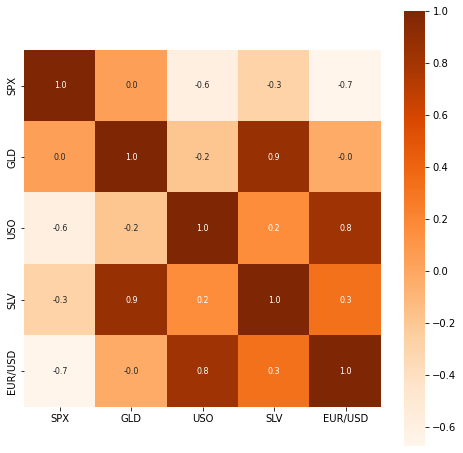

In [ ]:
correlation = golddata.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')   
#Constructing the heatmap to understand the correlations
#square=True gives square map and fmt='.1f' which gives only 1 decimal floating points it will give.

Observations:
1. The poitive values represent the positive Correlation and the negative values represent the negative Correlation.
2. if we observe the GLD(Gold) vs SLV(Silver). They are postive correlated by the unit of 0.9

In [ ]:
print(correlation)  #correlation values of different parameters like gold silver etc. If we want gold alone we can use print(correlation['GLD])

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


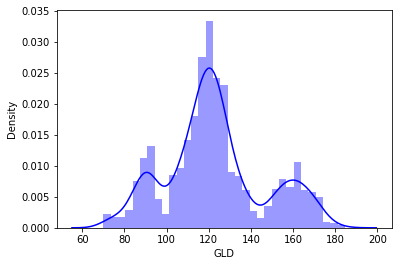

In [ ]:
# we will check the distribution of the GOLD price
sns.distplot(golddata['GLD'], color='Blue')

So we can see that the most of the Gold Price lies in the range around 120 from the 10 Years data.

Now we will split the data and the specific target such as Gold

In [ ]:
X = golddata.drop(['Date','GLD'],axis=1)   #we have removed the date and Gold data from the set
Y = golddata['GLD']     #we have assigned the Gold data to the Y because we are predicting the Gold price itself so we need it.
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Now we have to Separate the data into train data and test data.
1. We will train our ML Algorithm using training data and Evaluate our regressor using the test data
2. 80% of the data will be assigned for training and the 20% will be assigned to the testing

In [ ]:
#Splitting data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#X_train consists of train data of parameters except Gold and we have to predict the Gold
#Y_train consists of training data of the gold

**Training the model: Random Forest Regression**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)    

In [ ]:
#now we are training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Now the model is trained and we have to do the model Evaluation now

**Model Evaluation**

In [ ]:
#evaluation or data prediction based on the test data
test_data_prediction = regressor.predict(X_test)           #prediction of the Gold price using the X_test data
print(test_data_prediction)             

[168.61059935  81.79219994 116.05030022 127.67320073 120.77830075
 154.84759779 150.80329854 126.01130108 117.49939891 125.99150092
 116.63760118 172.40880127 142.17039832 167.94429841 115.28940007
 117.86580052 137.90880296 170.11520132 159.05490362 157.80759894
 155.07490029 124.95750025 175.68249874 156.99490328 125.11680043
  93.68489954  77.73109992 120.41370025 119.00749904 167.45750002
  87.85780062 125.04369972  91.13930121 117.74560019 121.13679899
 136.73970115 115.5221011  114.96060108 147.76439989 107.11980105
 104.66350264  87.14089787 126.55430052 118.1689     153.656499
 119.65980007 108.39390008 108.53239806  93.24750074 127.16879774
  74.40950054 113.52629901 121.23450028 111.3135991  119.08509904
 120.54039955 158.52650032 168.67240081 146.9302969   85.80269831
  94.16900031  86.85239891  90.83589984 118.87890073 126.44250091
 127.37270032 169.4188991  122.26059945 117.33369905  98.51999984
 168.02340096 143.40429904 132.16740248 121.33030229 121.69629958
 119.8398006

The above are the predicted Gold Prices.

*   We have to compare the predicted values with the Actual values of Gold
*   the actual values are Y_test and the predicted values are stored in X_test


In [32]:
error_score = metrics.r2_score(Y_test, test_data_prediction) #we are using the R square error to find the different between the actual and predicted values
print("R Squared Error is ", error_score)

R Squared Error is  0.9883346683417857



*   So the above is the error value which is the error difference between the Actual Gold prices and the predicted Gold prices.
*   We will compare the Actual values and Predcited Values using a Plot




<function matplotlib.pyplot.show>

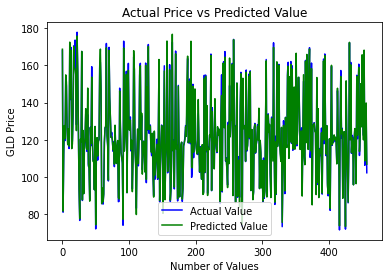

In [36]:
plt.plot(list(Y_test), color='Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='Green', label='Predicted Value')
plt.title('Actual Price vs Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show

**CONCLUSION**

*   We can see that the predicted Values are very close to the actual values
*   Actual values are bit higher than the Predicted values i.e what the Error of 0.98...shows.

*   We have succesfully implemented the Random Forest Regressor to predict the Gold Prices using the past data with the R-sqaure error of  0.9883346683417857


